In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import tensorflow as tf 
from tensorflow.keras.layers import Input, Dense, Flatten,Conv1D,MaxPooling1D
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from sklearn.metrics import recall_score, f1_score, confusion_matrix,precision_score
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier



# Load Data

In [3]:
data = pd.read_csv("heart_disease_health_indicators_BRFSS2015.csv")

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   HeartDiseaseorAttack  253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   Diabetes              253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [5]:
'''cor_matrix = data.corr().abs()
cor_matrix'''

'cor_matrix = data.corr().abs()\ncor_matrix'

In [6]:
#specify features and target columns
target = data['HeartDiseaseorAttack']
#features = data.drop(to_drop, axis=1)
features = data.drop(['HeartDiseaseorAttack'],axis=1)

In [7]:
features.head()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


# Data Scaling

In [8]:
#Data Scaling
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(features)

# UnderSampling

In [9]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(scaled_features, target)

# PCA 

In [36]:
from sklearn.decomposition import PCA

# Create principal components
pca = PCA(n_components=5)
X_pca = pca.fit_transform(X_resampled)

# Convert to dataframe
component_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]
X_pca = pd.DataFrame(X_pca, columns=component_names)

X_pca.head()

,PC1,PC2,PC3,PC4,PC5
0,-1.131175,0.694856,-0.053913,-0.015371,-0.002466
1,-0.919548,0.282630,0.100437,-0.791856,-0.415444
2,-0.464422,-0.649249,-0.197588,-0.573263,-0.176146
3,1.164981,-0.141855,1.102340,-0.138762,0.171113
4,-0.978751,-0.175917,0.282210,0.186637,0.656860


# Plot Variance of PCA

Text(0.5, 1.0, '(b)')

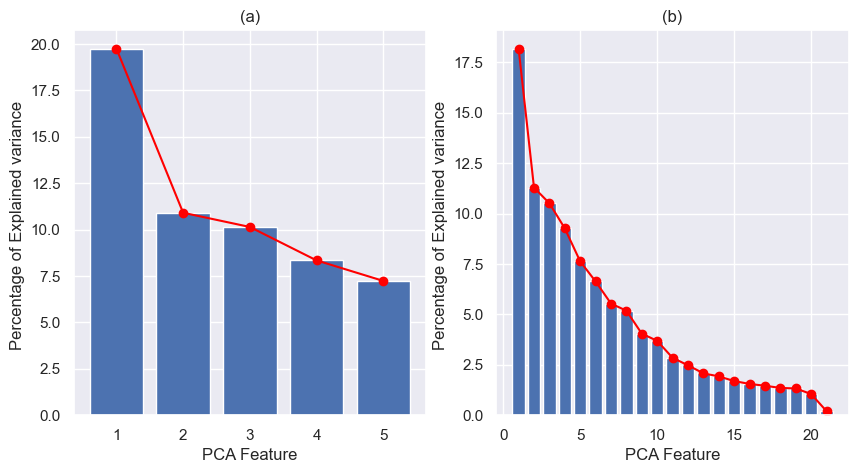

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

sns.set()

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

pca = PCA(n_components=5)

pca.fit_transform(X_resampled)



axs[0].bar(range(1,len(pca.explained_variance_)+1), pca.explained_variance_ratio_ * 100)
axs[0].plot(range(1,len(pca.explained_variance_)+1), pca.explained_variance_ratio_ * 100, marker='o', color='red')
axs[0].set_xlabel('PCA Feature')
axs[0].set_ylabel('Percentage of Explained variance ')
axs[0].set_title("(a)")


pca1 = PCA(n_components=21)

pca1.fit_transform(scaled_features)

axs[1].bar(range(1,len(pca1.explained_variance_)+1), pca1.explained_variance_ratio_ * 100)
axs[1].plot(range(1,len(pca1.explained_variance_)+1), pca1.explained_variance_ratio_ * 100, marker='o', color='red')
axs[1].set_xlabel('PCA Feature')
axs[1].set_ylabel('Percentage of Explained variance ')
axs[1].set_title("(b)")

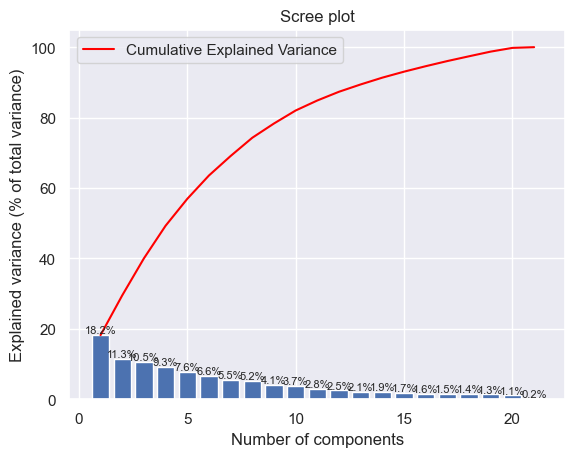

In [34]:
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.decomposition import PCA
sns.set()

# Reduce from 4 to 3 features with PCA
pca = PCA(n_components=21)

# Fit and transform data
reduced_features = pca.fit_transform(scaled_features)

# Bar plot of explained_variance
explained_var_ratio = pca.explained_variance_ratio_
plt.bar(
    range(1,len(explained_var_ratio)+1),
    explained_var_ratio*100
    )

for i, value in enumerate(explained_var_ratio):
    plt.text(i+1, value*100+0.5, f'{value*100:.1f}%', ha='center', fontsize=8)

plt.plot(
    range(1,len(explained_var_ratio)+1),
    np.cumsum(explained_var_ratio)*100,
    c='red',
    label='Cumulative Explained Variance')

plt.legend(loc='upper left')
plt.xlabel('Number of components')
plt.ylabel('Explained variance (% of total variance)')
plt.title('Scree plot')

plt.show()



In [37]:
loadings = pd.DataFrame(
    pca.components_.T,  # transpose the matrix of loadings
    columns=component_names,  # so the columns are the principal components
    index=features.columns,  # and the rows are the original features
)
abs(loadings)


,PC1,PC2,PC3,PC4,PC5
HighBP,0.422260,0.168110,0.358554,0.226538,0.004185
HighChol,0.351794,0.253556,0.413427,0.261853,0.419617
CholCheck,0.019714,0.006635,0.031539,0.015727,0.002908
BMI,0.028784,0.002883,0.000789,0.012828,0.017233
Smoker,0.257571,0.328142,0.194976,0.748349,0.428998
Stroke,0.122816,0.035266,0.013319,0.024378,0.053563
Diabetes,0.283650,0.018336,0.120330,0.086558,0.195952
PhysActivity,0.296311,0.204013,0.269755,0.022329,0.165829
Fruits,0.148572,0.211789,0.641585,0.445981,0.285551
Veggies,0.128346,0.057509,0.336419,0.257130,0.018559


# PCA with n_components=5

In [13]:
import numpy as np
from sklearn.decomposition import PCA
# Perform PCA with n=15 components
pca = PCA(n_components=5)
X_pca = pca.fit_transform(X_resampled)

# Print the explained variance ratio of each component
print(pca.explained_variance_ratio_)

[0.1975239  0.10909001 0.10142704 0.08342077 0.0723701 ]


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y_resampled ,stratify=y_resampled, test_size=0.2)

# Model 1 : DecisionTreeClassifier

In [15]:
model=DecisionTreeClassifier(max_depth=int(5),
                             random_state=11)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
pred = precision_score(y_test, y_pred)

print("DecisionTree Classifier Accuracy: ",accuracy_score(y_test, y_pred))
print("DecisionTreeClassifier Classifier Recall: ", recall)
print("DecisionTreeClassifier F1 Score: ", f1)
print("DecisionTreeClassifier Precision: ", pred)
print("Confusion Matrix:\n", cm)


print(classification_report(y_test, y_pred))

DecisionTree Classifier Accuracy:  0.7345679012345679
DecisionTreeClassifier Classifier Recall:  0.7913789495710399
DecisionTreeClassifier F1 Score:  0.7488367488367488
DecisionTreeClassifier Precision:  0.7106350995866215
Confusion Matrix:
 [[3239 1540]
 [ 997 3782]]
              precision    recall  f1-score   support

         0.0       0.76      0.68      0.72      4779
         1.0       0.71      0.79      0.75      4779

    accuracy                           0.73      9558
   macro avg       0.74      0.73      0.73      9558
weighted avg       0.74      0.73      0.73      9558



# Model 2 : Naive Bayes

In [16]:
#Basic Naive Bayes
from sklearn.naive_bayes import GaussianNB

Gnb = GaussianNB()
Gnb.fit(X_train, y_train)
y_pred = Gnb.predict(X_test)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)

print("Naive Bayes Classifier Accuracy: ", acc)
print("Naive Bayes Classifier Recall: ", recall)
print("Naive Bayes Classifier F1 Score: ", f1)
print("Confusion Matrix:\n", cm)

Naive Bayes Classifier Accuracy:  0.739903745553463
Naive Bayes Classifier Recall:  0.7430424775057544
Naive Bayes Classifier F1 Score:  0.7407175636211931
Confusion Matrix:
 [[3521 1258]
 [1228 3551]]


In [17]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.74      0.74      0.74      4779
         1.0       0.74      0.74      0.74      4779

    accuracy                           0.74      9558
   macro avg       0.74      0.74      0.74      9558
weighted avg       0.74      0.74      0.74      9558



# Model 3 : GradientBoostingClassifier

In [18]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import recall_score

# create GradientBoostingClassifier object
gbc = GradientBoostingClassifier()

# fit the model on training data
gbc.fit(X_train, y_train)

# predict on test data
y_pred = gbc.predict(X_test)

# calculate recall
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
pred = precision_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)

print("GradientBoostingClassifier Accuracy: ", acc)
print("GradientBoostingClassifier Precision: ", pred)
print("GradientBoostingClassifier Recall: ", recall)
print("GradientBoostingClassifier F1 Score: ", f1)
print("Confusion Matrix:\n", cm)

GradientBoostingClassifier Accuracy:  0.7448210922787194
GradientBoostingClassifier Precision:  0.7251732101616628
GradientBoostingClassifier Recall:  0.7884494664155681
GradientBoostingClassifier F1 Score:  0.7554887218045112
Confusion Matrix:
 [[3351 1428]
 [1011 3768]]


In [19]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.77      0.70      0.73      4779
         1.0       0.73      0.79      0.76      4779

    accuracy                           0.74      9558
   macro avg       0.75      0.74      0.74      9558
weighted avg       0.75      0.74      0.74      9558



# Model 4 : Random Forest

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score

# create RandomForestClassifier object
rfc = RandomForestClassifier()

# fit the model on training data
rfc.fit(X_train, y_train)

# predict on test data
y_pred = rfc.predict(X_test)

recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
pred = precision_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)

print("RandomForestClassifier Accuracy: ", acc)
print("RandomForestClassifier Precision: ", pred)
print("RandomForestClassifier Recall: ", recall)
print("RandomForestClassifier F1 Score: ", f1)
print("Confusion Matrix:\n", cm)

RandomForestClassifier Accuracy:  0.7377066331868591
RandomForestClassifier Precision:  0.721875
RandomForestClassifier Recall:  0.77338355304457
RandomForestClassifier F1 Score:  0.7467420951611274
Confusion Matrix:
 [[3355 1424]
 [1083 3696]]


In [21]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.76      0.70      0.73      4779
         1.0       0.72      0.77      0.75      4779

    accuracy                           0.74      9558
   macro avg       0.74      0.74      0.74      9558
weighted avg       0.74      0.74      0.74      9558



# Model 5 : LightGBM

In [22]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score, recall_score

# create LGBMClassifier object
lgbm = lgb.LGBMClassifier()

# fit the model on training data
lgbm.fit(X_train, y_train)

# predict on test data
y_pred = lgbm.predict(X_test)


recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
pred = precision_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)

print("lightgbm Accuracy: ", acc)
print("lightgbm Precision: ", pred)
print("lightgbm Recall: ", recall)
print("lightgbm F1 Score: ", f1)
print("Confusion Matrix:\n", cm)

C:\Users\MSI GF 63\miniconda3\envs\tf\lib\site-packages\cupy\_environment.py:213: UserWarning: CUDA path could not be detected. Set CUDA_PATH environment variable if CuPy fails to load.
  warnings.warn(


lightgbm Accuracy:  0.7493199414103369
lightgbm Precision:  0.7281255983151446
lightgbm Recall:  0.7957731743042478
lightgbm F1 Score:  0.7604479104179164
Confusion Matrix:
 [[3359 1420]
 [ 976 3803]]


In [23]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.77      0.70      0.74      4779
         1.0       0.73      0.80      0.76      4779

    accuracy                           0.75      9558
   macro avg       0.75      0.75      0.75      9558
weighted avg       0.75      0.75      0.75      9558



# Model 6 : CatBoostClassifier

In [24]:
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score

# create CatBoost classifier
catboost = CatBoostClassifier()

# train the classifier
catboost.fit(X_train, y_train)

# make predictions on the test data
y_pred = catboost.predict(X_test)

recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
pred = precision_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)

print("CatBoostClassifier Accuracy: ", acc)
print("CatBoostClassifier Precision: ", pred)
print("CatBoostClassifier Recall: ", recall)
print("CatBoostClassifier F1 Score: ", f1)
print("Confusion Matrix:\n", cm)

Learning rate set to 0.048821
0:	learn: 0.6778652	total: 157ms	remaining: 2m 36s
1:	learn: 0.6629478	total: 166ms	remaining: 1m 22s
2:	learn: 0.6497863	total: 174ms	remaining: 57.8s
3:	learn: 0.6380277	total: 182ms	remaining: 45.3s
4:	learn: 0.6276315	total: 190ms	remaining: 37.7s
5:	learn: 0.6177363	total: 200ms	remaining: 33.1s
6:	learn: 0.6091765	total: 210ms	remaining: 29.8s
7:	learn: 0.6012711	total: 220ms	remaining: 27.2s
8:	learn: 0.5941791	total: 228ms	remaining: 25.1s
9:	learn: 0.5886578	total: 236ms	remaining: 23.4s
10:	learn: 0.5832053	total: 244ms	remaining: 22s
11:	learn: 0.5783761	total: 252ms	remaining: 20.7s
12:	learn: 0.5741842	total: 261ms	remaining: 19.8s
13:	learn: 0.5699779	total: 267ms	remaining: 18.8s
14:	learn: 0.5662164	total: 274ms	remaining: 18s
15:	learn: 0.5631582	total: 282ms	remaining: 17.3s
16:	learn: 0.5600339	total: 288ms	remaining: 16.7s
17:	learn: 0.5573833	total: 297ms	remaining: 16.2s
18:	learn: 0.5546999	total: 304ms	remaining: 15.7s
19:	learn: 0.

175:	learn: 0.5125016	total: 1.64s	remaining: 7.66s
176:	learn: 0.5123129	total: 1.65s	remaining: 7.65s
177:	learn: 0.5122339	total: 1.65s	remaining: 7.64s
178:	learn: 0.5121539	total: 1.66s	remaining: 7.63s
179:	learn: 0.5120955	total: 1.67s	remaining: 7.62s
180:	learn: 0.5120618	total: 1.68s	remaining: 7.6s
181:	learn: 0.5120028	total: 1.69s	remaining: 7.59s
182:	learn: 0.5119465	total: 1.7s	remaining: 7.58s
183:	learn: 0.5118388	total: 1.71s	remaining: 7.57s
184:	learn: 0.5117309	total: 1.71s	remaining: 7.55s
185:	learn: 0.5116548	total: 1.72s	remaining: 7.54s
186:	learn: 0.5115487	total: 1.73s	remaining: 7.54s
187:	learn: 0.5114845	total: 1.75s	remaining: 7.54s
188:	learn: 0.5114273	total: 1.75s	remaining: 7.53s
189:	learn: 0.5113528	total: 1.76s	remaining: 7.52s
190:	learn: 0.5112997	total: 1.77s	remaining: 7.51s
191:	learn: 0.5112282	total: 1.78s	remaining: 7.5s
192:	learn: 0.5111938	total: 1.79s	remaining: 7.48s
193:	learn: 0.5111443	total: 1.8s	remaining: 7.47s
194:	learn: 0.51

349:	learn: 0.4989802	total: 3.31s	remaining: 6.15s
350:	learn: 0.4988936	total: 3.32s	remaining: 6.14s
351:	learn: 0.4987883	total: 3.33s	remaining: 6.13s
352:	learn: 0.4987350	total: 3.34s	remaining: 6.12s
353:	learn: 0.4986695	total: 3.35s	remaining: 6.11s
354:	learn: 0.4986276	total: 3.36s	remaining: 6.1s
355:	learn: 0.4985473	total: 3.37s	remaining: 6.1s
356:	learn: 0.4984425	total: 3.38s	remaining: 6.09s
357:	learn: 0.4983831	total: 3.39s	remaining: 6.08s
358:	learn: 0.4983182	total: 3.4s	remaining: 6.07s
359:	learn: 0.4982229	total: 3.41s	remaining: 6.07s
360:	learn: 0.4981676	total: 3.42s	remaining: 6.06s
361:	learn: 0.4980752	total: 3.43s	remaining: 6.05s
362:	learn: 0.4979761	total: 3.44s	remaining: 6.04s
363:	learn: 0.4978821	total: 3.45s	remaining: 6.03s
364:	learn: 0.4978289	total: 3.46s	remaining: 6.03s
365:	learn: 0.4977679	total: 3.47s	remaining: 6.02s
366:	learn: 0.4977157	total: 3.48s	remaining: 6.01s
367:	learn: 0.4976566	total: 3.49s	remaining: 6s
368:	learn: 0.4975

519:	learn: 0.4879925	total: 5s	remaining: 4.61s
520:	learn: 0.4879369	total: 5s	remaining: 4.6s
521:	learn: 0.4878584	total: 5.02s	remaining: 4.59s
522:	learn: 0.4877938	total: 5.03s	remaining: 4.58s
523:	learn: 0.4877048	total: 5.04s	remaining: 4.58s
524:	learn: 0.4876529	total: 5.05s	remaining: 4.57s
525:	learn: 0.4875967	total: 5.05s	remaining: 4.55s
526:	learn: 0.4875458	total: 5.06s	remaining: 4.54s
527:	learn: 0.4875053	total: 5.07s	remaining: 4.54s
528:	learn: 0.4874179	total: 5.08s	remaining: 4.53s
529:	learn: 0.4873510	total: 5.09s	remaining: 4.52s
530:	learn: 0.4873150	total: 5.1s	remaining: 4.51s
531:	learn: 0.4872299	total: 5.11s	remaining: 4.5s
532:	learn: 0.4871762	total: 5.12s	remaining: 4.49s
533:	learn: 0.4871182	total: 5.13s	remaining: 4.48s
534:	learn: 0.4870365	total: 5.14s	remaining: 4.47s
535:	learn: 0.4869910	total: 5.15s	remaining: 4.46s
536:	learn: 0.4869136	total: 5.16s	remaining: 4.45s
537:	learn: 0.4868378	total: 5.17s	remaining: 4.44s
538:	learn: 0.4867790

696:	learn: 0.4782635	total: 6.9s	remaining: 3s
697:	learn: 0.4782320	total: 6.91s	remaining: 2.99s
698:	learn: 0.4781684	total: 6.92s	remaining: 2.98s
699:	learn: 0.4781188	total: 6.93s	remaining: 2.97s
700:	learn: 0.4780576	total: 6.94s	remaining: 2.96s
701:	learn: 0.4780210	total: 6.95s	remaining: 2.95s
702:	learn: 0.4779804	total: 6.96s	remaining: 2.94s
703:	learn: 0.4779202	total: 6.98s	remaining: 2.93s
704:	learn: 0.4778600	total: 7s	remaining: 2.93s
705:	learn: 0.4778051	total: 7.01s	remaining: 2.92s
706:	learn: 0.4777645	total: 7.02s	remaining: 2.91s
707:	learn: 0.4777094	total: 7.03s	remaining: 2.9s
708:	learn: 0.4776746	total: 7.04s	remaining: 2.89s
709:	learn: 0.4776274	total: 7.05s	remaining: 2.88s
710:	learn: 0.4775758	total: 7.06s	remaining: 2.87s
711:	learn: 0.4775176	total: 7.07s	remaining: 2.86s
712:	learn: 0.4774495	total: 7.08s	remaining: 2.85s
713:	learn: 0.4773848	total: 7.09s	remaining: 2.84s
714:	learn: 0.4773075	total: 7.1s	remaining: 2.83s
715:	learn: 0.4772541

863:	learn: 0.4703211	total: 8.56s	remaining: 1.35s
864:	learn: 0.4702761	total: 8.57s	remaining: 1.34s
865:	learn: 0.4702436	total: 8.58s	remaining: 1.33s
866:	learn: 0.4701900	total: 8.6s	remaining: 1.32s
867:	learn: 0.4701452	total: 8.61s	remaining: 1.31s
868:	learn: 0.4701018	total: 8.62s	remaining: 1.3s
869:	learn: 0.4700307	total: 8.63s	remaining: 1.29s
870:	learn: 0.4700035	total: 8.64s	remaining: 1.28s
871:	learn: 0.4699405	total: 8.65s	remaining: 1.27s
872:	learn: 0.4699038	total: 8.66s	remaining: 1.26s
873:	learn: 0.4698665	total: 8.67s	remaining: 1.25s
874:	learn: 0.4698278	total: 8.68s	remaining: 1.24s
875:	learn: 0.4697766	total: 8.69s	remaining: 1.23s
876:	learn: 0.4697298	total: 8.7s	remaining: 1.22s
877:	learn: 0.4696882	total: 8.71s	remaining: 1.21s
878:	learn: 0.4696495	total: 8.72s	remaining: 1.2s
879:	learn: 0.4696041	total: 8.73s	remaining: 1.19s
880:	learn: 0.4695681	total: 8.74s	remaining: 1.18s
881:	learn: 0.4695294	total: 8.75s	remaining: 1.17s
882:	learn: 0.46

In [25]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.78      0.71      0.74      4779
         1.0       0.73      0.80      0.77      4779

    accuracy                           0.76      9558
   macro avg       0.76      0.76      0.76      9558
weighted avg       0.76      0.76      0.76      9558



# Model 7 : XGBClassifier

In [26]:
from xgboost import XGBClassifier
xg = XGBClassifier()
xg.fit(X_train, y_train)
y_pred = xg.predict(X_test)


recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
pred = precision_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)


print("XGBClassifier Accuracy: ", acc)
print("XGBClassifier Precision: ", pred)
print("XGBClassifier Recall: ", recall)
print("XGBClassifier F1 Score: ", f1)
print("Confusion Matrix:\n", cm)

XGBClassifier Accuracy:  0.7502615609960243
XGBClassifier Precision:  0.7298232129131438
XGBClassifier Recall:  0.7947269303201506
XGBClassifier F1 Score:  0.7608935189822698
Confusion Matrix:
 [[3373 1406]
 [ 981 3798]]


In [27]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.77      0.71      0.74      4779
         1.0       0.73      0.79      0.76      4779

    accuracy                           0.75      9558
   macro avg       0.75      0.75      0.75      9558
weighted avg       0.75      0.75      0.75      9558



# CNN

In [28]:
import numpy as np
X_train_2d=np.expand_dims(X_train,axis=2)
n_timesteps,n_features=X_train_2d.shape[1],X_train_2d.shape[2]
#CNN Initialization
model=Sequential()
model.add(Conv1D(filters=16,kernel_size=2,activation="relu",input_shape=(n_timesteps,n_features)))
#CNN Pooling
model.add(MaxPooling1D(pool_size=2))
#flatten layer
model.add(Flatten())
#Fully connected Layer
model.add(Dense(16,activation="relu"))
#Decision Layer
model.add(Dense(1,activation="sigmoid"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 4, 16)             48        
                                                                 
 max_pooling1d (MaxPooling1D  (None, 2, 16)            0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 16)                528       
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 593
Trainable params: 593
Non-trainable params: 0
__________________________________________________________

# Recall

In [29]:
from tensorflow.keras.metrics import Recall

model.compile(loss = 'binary_crossentropy',optimizer = tf.keras.optimizers.Adam(lr=0.001),
                metrics = [Recall()])

history = model.fit(X_train_2d, y_train,validation_split=0.34,shuffle=True,epochs=25,batch_size=64,verbose=1)

Epoch 1/25


C:\Users\MSI GF 63\miniconda3\envs\tf\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
C:\Users\MSI GF 63\miniconda3\envs\tf\lib\site-packages\keras\engine\data_adapter.py:1699: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


395/395 [==============================] - 5s 6ms/step - loss: 0.5836 - recall: 0.7298 - val_loss: 0.5560 - val_recall: 0.7213
Epoch 2/25
395/395 [==============================] - 2s 5ms/step - loss: 0.5432 - recall: 0.7522 - val_loss: 0.5498 - val_recall: 0.7317
Epoch 3/25
395/395 [==============================] - 2s 5ms/step - loss: 0.5379 - recall: 0.7552 - val_loss: 0.5476 - val_recall: 0.7943
Epoch 4/25
395/395 [==============================] - 2s 5ms/step - loss: 0.5349 - recall: 0.7636 - val_loss: 0.5430 - val_recall: 0.7705
Epoch 5/25
395/395 [==============================] - 2s 5ms/step - loss: 0.5327 - recall: 0.7659 - val_loss: 0.5416 - val_recall: 0.7680
Epoch 6/25
395/395 [==============================] - 2s 5ms/step - loss: 0.5312 - recall: 0.7726 - val_loss: 0.5403 - val_recall: 0.7697
Epoch 7/25
395/395 [==============================] - 2s 5ms/step - loss: 0.5306 - recall: 0.7715 - val_loss: 0.5393 - val_recall: 0.7861
Epoch 8/25
395/395 [=========================

# Accuracy

In [30]:
model.compile(loss = 'binary_crossentropy',optimizer = tf.keras.optimizers.Adam(lr=0.009),
                metrics = ['accuracy'])
history = model.fit(X_train_2d, y_train,validation_split=0.34,shuffle=True,epochs=25,batch_size=64,verbose=1)

Epoch 1/25
395/395 [==============================] - 3s 6ms/step - loss: 0.5346 - accuracy: 0.7311 - val_loss: 0.5397 - val_accuracy: 0.7228
Epoch 2/25
395/395 [==============================] - 2s 6ms/step - loss: 0.5318 - accuracy: 0.7346 - val_loss: 0.5511 - val_accuracy: 0.7233
Epoch 3/25
395/395 [==============================] - 3s 6ms/step - loss: 0.5299 - accuracy: 0.7321 - val_loss: 0.5398 - val_accuracy: 0.7283
Epoch 4/25
395/395 [==============================] - 2s 6ms/step - loss: 0.5293 - accuracy: 0.7351 - val_loss: 0.5352 - val_accuracy: 0.7289
Epoch 5/25
395/395 [==============================] - 2s 5ms/step - loss: 0.5293 - accuracy: 0.7351 - val_loss: 0.5441 - val_accuracy: 0.7255
Epoch 6/25
395/395 [==============================] - 2s 5ms/step - loss: 0.5283 - accuracy: 0.7351 - val_loss: 0.5388 - val_accuracy: 0.7311
Epoch 7/25
395/395 [==============================] - 2s 4ms/step - loss: 0.5278 - accuracy: 0.7361 - val_loss: 0.5422 - val_accuracy: 0.7243
Epoch 

# Precision 

In [31]:
from tensorflow.keras.metrics import Precision

model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(lr=0.001),
              metrics=[Precision()])

history = model.fit(X_train_2d, y_train, validation_split=0.34, shuffle=True, epochs=25, batch_size=64, verbose=1)

Epoch 1/25
395/395 [==============================] - 3s 6ms/step - loss: 0.5178 - precision: 0.7194 - val_loss: 0.5291 - val_precision: 0.7047
Epoch 2/25
395/395 [==============================] - 2s 6ms/step - loss: 0.5170 - precision: 0.7205 - val_loss: 0.5281 - val_precision: 0.7115
Epoch 3/25
395/395 [==============================] - 2s 6ms/step - loss: 0.5168 - precision: 0.7217 - val_loss: 0.5278 - val_precision: 0.7099
Epoch 4/25
395/395 [==============================] - 2s 6ms/step - loss: 0.5165 - precision: 0.7229 - val_loss: 0.5279 - val_precision: 0.7091
Epoch 5/25
395/395 [==============================] - 3s 7ms/step - loss: 0.5161 - precision: 0.7227 - val_loss: 0.5289 - val_precision: 0.7130
Epoch 6/25
395/395 [==============================] - 3s 8ms/step - loss: 0.5162 - precision: 0.7237 - val_loss: 0.5281 - val_precision: 0.7133
Epoch 7/25
395/395 [==============================] - 3s 7ms/step - loss: 0.5160 - precision: 0.7235 - val_loss: 0.5279 - val_precision: